In [11]:
from saiph.projection import fit, stats, inverse_transform
from visualization import plot_circle, plot_explained_var, plot_var_contribution
import pandas as pd
import numpy as np

from dataclasses import asdict

In [13]:
df = pd.read_csv('iris.csv')
df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [14]:
coord, model, param = fit(df, nf = 'all')
coord

FAMD is performed for dimension reduction


NameError: name 'famd' is not defined

In [ ]:
df = pd.read_csv('iris.csv')
coord, model, param = fit(df[['variety']])

coord, model, param = fit(df.drop(['variety'], axis = 1))
coord, model, param = fit(df, nf=4)

coord

In [3]:
model.mean

array([2.87500e+01, 1.38000e+02, 0.00000e+00, 1.75000e-03, 2.62500e-03,
       2.50000e-04, 0.00000e+00, 0.00000e+00, 6.10000e+01, 5.12500e-01,
       4.11250e+01, 6.52500e+00, 3.10000e+01, 1.25500e+02, 1.56500e+02,
       1.75000e+00, 1.25000e-01, 1.43750e+02, 1.41750e+02, 1.43625e+02,
       1.50000e+00, 1.25000e-01, 2.00000e+00])

In [4]:
print(asdict(model).keys())
print(asdict(param).keys())
# ici cos2 contrib et cor sont None (as well as D_c)

dict_keys(['df', 'V', 'explained_var', 'explained_var_ratio', 'variable_coord', 'U', 's', 'mean', 'std', 'prop', '_modalities', 'D_c'])
dict_keys(['nf', 'col_w', 'row_w', 'columns', 'quanti', 'quali', 'datetime_variables', 'cor', 'contrib', 'cos2'])


In [5]:
# stats peut prendre un peu de temps s'il s; agit de plusieurs variables et indivuds (50000+)
param = stats(model, param)
print(param.cos2)


                                                      Dim. 0    Dim. 1  \
Unnamed: 0                                          0.183477  0.321403   
baseline value                                      0.741256  0.201364   
accelerations                                            NaN       NaN   
fetal_movement                                      0.424727  0.111575   
uterine_contractions                                0.801019  0.000206   
light_decelerations                                 0.405638  0.299673   
severe_decelerations                                     NaN       NaN   
prolongued_decelerations                                 NaN       NaN   
abnormal_short_term_variability                     0.550856  0.043690   
mean_value_of_short_term_variability                0.336166  0.063905   
percentage_of_time_with_abnormal_long_term_vari...  0.008109  0.652407   
mean_value_of_long_term_variability                 0.229514  0.436387   
histogram_width                       

In [6]:
param.contrib

,Dim. 0,Dim. 1,Dim. 2,Dim. 3,Dim. 4,Dim. 5,Dim. 6,Dim. 7
Unnamed: 0,2.432431,7.368597,0.631346,16.070642,3.003082,5.365645,37.098886,1.938087
baseline value,9.827129,4.616538,1.044563,0.067296,0.198166,3.138128,0.775584,1.198964
accelerations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fetal_movement,5.630782,2.558011,2.090627,14.265655,8.171967,6.187970,2.221077,0.280972
uterine_contractions,10.619426,0.004722,0.564077,1.746358,7.092931,5.816783,10.750901,4.597598
light_decelerations,5.377704,6.870418,5.664829,3.661079,0.565430,6.495405,0.497197,15.044431
severe_decelerations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prolongued_decelerations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abnormal_short_term_variability,7.302915,1.001654,2.402856,3.175274,8.014187,30.129719,2.670286,5.300734
mean_value_of_short_term_variability,4.456687,1.465118,14.956796,0.006835,5.543785,6.067746,5.332752,6.036992


In [7]:
inverse_transform(coord, model, param)
# warning for less dimensions 
# nf?

,Unnamed: 0,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,7,128.0,-0.0,0.005,0.000,0.000,0.0,0.0,74.0,0.2,...,122.0,144.0,1.0,-0.0,133.0,130.0,132.0,1.0,-0.0,2.0
1,10,152.0,0.0,-0.000,0.003,0.000,-0.0,0.0,61.0,0.4,...,129.0,163.0,3.0,1.0,160.0,157.0,160.0,1.0,1.0,2.0
2,17,130.0,0.0,0.002,-0.000,0.002,-0.0,0.0,75.0,0.3,...,105.0,165.0,6.0,0.0,130.0,129.0,131.0,1.0,0.0,2.0
3,36,138.0,-0.0,0.005,0.003,0.000,-0.0,0.0,62.0,0.5,...,121.0,148.0,1.0,-0.0,142.0,140.0,142.0,1.0,1.0,2.0
4,38,129.0,-0.0,0.002,0.000,0.000,0.0,0.0,69.0,0.3,...,127.0,152.0,0.0,0.0,139.0,135.0,136.0,4.0,-1.0,2.0
5,39,140.0,-0.0,0.000,0.006,-0.000,0.0,0.0,42.0,1.4,...,124.0,172.0,1.0,0.0,151.0,150.0,151.0,4.0,0.0,2.0
6,40,149.0,-0.0,0.000,0.006,-0.000,-0.0,0.0,61.0,0.4,...,146.0,159.0,1.0,0.0,154.0,153.0,155.0,0.0,0.0,2.0
7,43,138.0,0.0,0.000,0.003,0.000,0.0,0.0,44.0,0.6,...,130.0,149.0,1.0,0.0,141.0,140.0,142.0,0.0,0.0,2.0


In [ ]:
df

In [8]:
param.cor

,Dim. 0,Dim. 1,Dim. 2,Dim. 3,Dim. 4,Dim. 5,Dim. 6,Dim. 7
Unnamed: 0,-0.428342,-0.566924,0.143050,0.540823,-0.186516,-0.173224,-0.342596,0.311681
baseline value,-0.860962,0.448736,-0.184001,-0.034997,-0.047912,-0.132475,-0.049535,0.245147
accelerations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fetal_movement,0.651711,-0.334029,-0.260310,-0.509548,-0.307677,-0.186025,0.083827,-0.118674
uterine_contractions,-0.894997,-0.014352,0.135214,0.178281,-0.286645,-0.180360,0.184427,0.480054
light_decelerations,0.636897,0.547424,0.428496,0.258133,-0.080932,-0.190590,-0.039661,-0.868385
severe_decelerations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prolongued_decelerations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abnormal_short_term_variability,0.742197,0.209022,-0.279072,-0.240397,0.304692,-0.410483,0.091914,-0.515457
mean_value_of_short_term_variability,-0.579798,-0.252795,0.696261,0.011153,-0.253416,0.184209,0.129891,0.550091


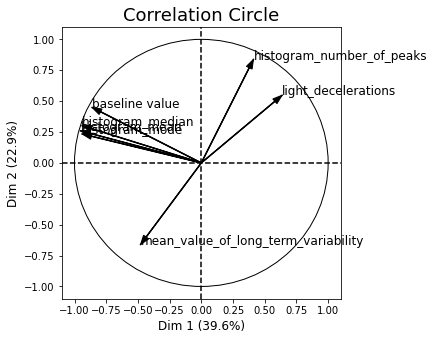

In [9]:
plot_circle(model, param)

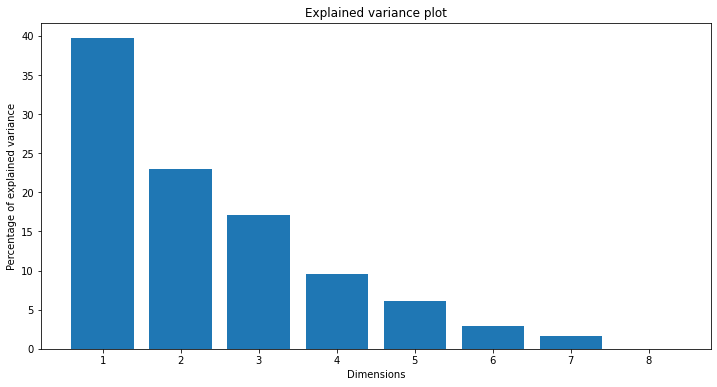

In [10]:
plot_explained_var(model, param)

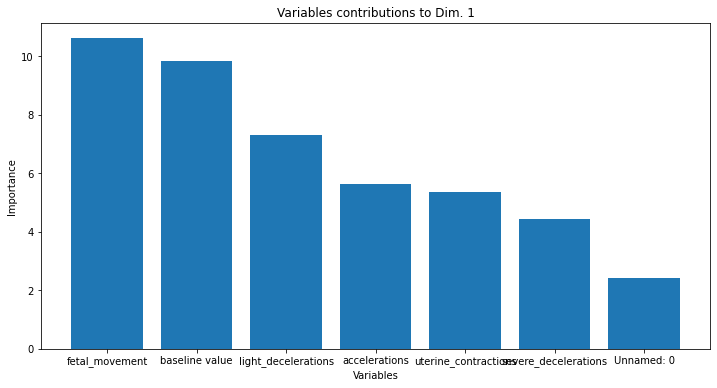

In [11]:
plot_var_contribution(model, param)

In [ ]:
# plot of the projections left to do